# Setup

In [7]:
import sys
sys.path.append("..")
from PDESystem import *
from PDESubsystem import *
from pdeforms import *

%load_ext autoreload
%autoreload 2

class pde_solver(PDESystem):
    def __init__(self, comp, mesh, parameters):
        PDESystem.__init__(self, comp, mesh, parameters)

    def setup_bcs(self):
        x, y = fd.SpatialCoordinate(self.mesh)
        
        bcu = [fd.DirichletBC(self.V['u'], fd.Constant((0,0)), (1, 4)), # top-bottom and cylinder
          fd.DirichletBC(self.V['u'], ((4.0*1.5*y*(0.41 - y) / 0.41**2) ,0), 2)] # inflow
        bcp = [fd.DirichletBC(self.V['p'], fd.Constant(0), 3)]  # outflow
        
        self.bc['up']['u'] = [[bcu, 'fixed']]
        self.bc['up']['p'] = [[bcp, 'fixed']]
    
    def setup_constants(self):
        self.constants = {
            'k' : fd.Constant(self.prm['dt']),
            'n' : fd.FacetNormal(self.mesh),
            'f' : fd.Constant((0.0, 0.0)),
            'nu' : fd.Constant(0.001)
        }

# Solve

In [22]:
solver_parameters = recursive_update(solver_parameters, 
{
'space': {'u': fd.VectorFunctionSpace},
'degree': {'u': 2},
'linear_solver': {'u': 'gmres', 'p': 'gmres'},
'subsystem_class' : {'up' : navier_stokes},
'precond': {'u': 'sor', 'p':'sor'},
'dt' : 0.001,
'T' :1
}
)

mesh = fd.Mesh("../../../meshes/flow_past_cylinder.msh")
solver = pde_solver([['u', 'p']], mesh, solver_parameters)
solver.setup_bcs()
solver.setup_constants()
solver.define(['u', 'p', 'u'], 'up')
solver.solve()

[None, None, None]
{'p': 0, 'u': 0}
[[<firedrake.bcs.DirichletBC object at 0x7f3cdb36f320>, <firedrake.bcs.DirichletBC object at 0x7f3cdb36f400>], [<firedrake.bcs.DirichletBC object at 0x7f3cdbc61e80>], None]
time = 1.000


# Plot

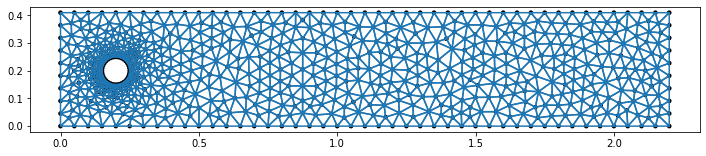

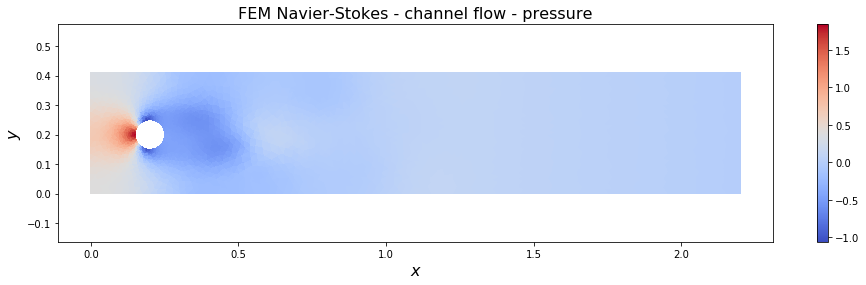

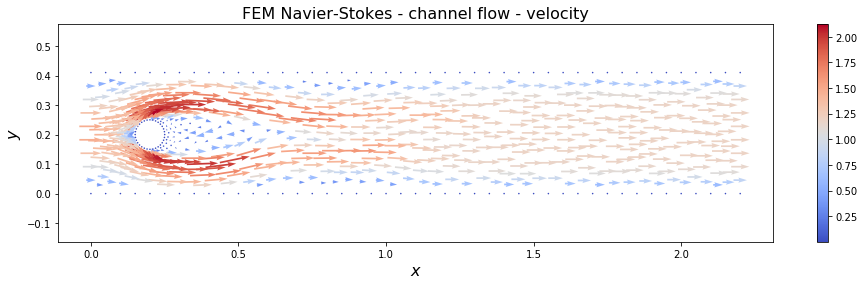

In [24]:
fig1 = plt.figure(figsize=(12, 4))
ax1 = fig1.add_subplot(111)
fd.plot(mesh, axes=ax1)

fig2 = plt.figure(figsize=(16, 4))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('FEM Navier-Stokes - channel flow - pressure', fontsize=16)
fd.plot(solver.form_args['p_'],axes=ax2)
ax2.axis('equal')

fig3 = plt.figure(figsize=(16, 4))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('FEM Navier-Stokes - channel flow - velocity', fontsize=16)
fd.plot(solver.form_args['u_'],axes=ax3)
ax3.axis('equal');